<a href="https://colab.research.google.com/github/rerebebeccacca/Recommend_system20210713/blob/main/digits_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

利用 make_classification 建立模擬資料
利用 sklearn.datasets.load_digits() 來讀取內建資料庫
用線性的SVC來做分類，以8x8的影像之像素值來當作特徵(共64個特徵)
用 metrics.classification_report 來提供辨識報表

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

觀察資料檔，每張影像所對照的實際數字存在digits.target變數中

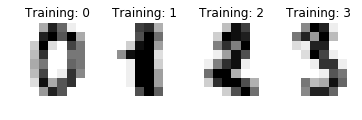

In [ ]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

使用reshape指令將8x8的影像資料攤平成64x1的矩陣。 接著用classifier = svm.SVC(gamma=0.001)產生一個SVC分類器(Support Vector Classification)。再將一半的資料送入分類器來訓練classifier.fit(資料:898x64, 分類目標:898x1)。SVC之預設kernel function為RBF (radial basis function): $$\exp(-\gamma |x-x'|^2)$$. 其中SVC(gamma=0.001)就是在設定RBF函數裏的$$\gamma$$ 這個值必需要大於零。最後，再利用後半部份的資料來測試訓練完成之SVC分類機predict(data[n_samples / 2:])將預測結果存入predicted變數，而原先的真實目標資料則存於expected變數，用於下一節之準確度統計。

In [ ]:
n_samples = len(digits.images)

# 資料攤平:1797 x 8 x 8 -> 1797 x 64
# 這裏的-1代表自動計算，相當於 (n_samples, 64)
data = digits.images.reshape((n_samples, -1))

# 產生SVC分類器
classifier = svm.SVC(gamma=0.001)

# 用前半部份的資料來訓練
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

expected = digits.target[n_samples // 2:]

#利用後半部份的資料來測試分類器，共 899筆資料
predicted = classifier.predict(data[n_samples // 2:])

分類準確度統計:
那在判斷準確度方面，我們可以使用一個名為「混淆矩陣」(Confusion matrix)的方式來統計。

In [ ]:
print("Confusion matrix:\n%s"
    % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


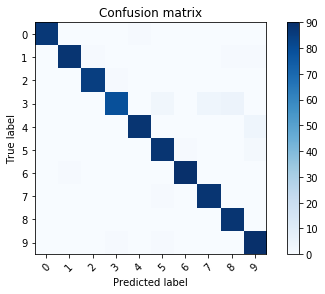

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    import numpy as np
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(digits.target_names))
    plt.xticks(tick_marks, digits.target_names, rotation=45)
    plt.yticks(tick_marks, digits.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(expected, predicted))

以手寫影像3為例，我們可以用四個數字來探討判斷的精準度。
True Positive(TP,真陽):實際為3且判斷為3，共79個
False Positive(FP,偽陽):判斷為3但判斷錯誤，共2個
False Negative(FN,偽陰):實際為3但判斷錯誤，共12個
True Negative(TN,真陰):實際不為3，且判斷正確。也就是其餘899-79-2-12=885個
而在機器學習理論中，我們通常用以下precision, recall, f1-score來探討精確度。以手寫影像3為例。
precision = TP/(TP+FP) = 79/81 = 0.98
判斷為3且實際為3的比例為0.98
recall = TP/(TP+FN) = 79/91 = 0.87
實際為3且判斷為3的比例為0.87
f1-score 則為以上兩者之「harmonic mean 調和平均數」
f1-score= 2 x precision x recall/(recision + recall) = 0.92

In [ ]:
print("Classification report for classifier %s:\n%s\n"
    % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

   micro avg       0.97      0.97      0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97 

此報表最後的 support，則代表著實際為手寫數字的總數。例如實際為3的數字共有91個。

用以下的程式碼可以觀察測試影像以及預測(分類)結果得對應關係

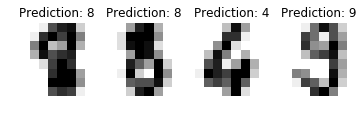

In [ ]:
images_and_predictions = list(
                        zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()